<a href="https://colab.research.google.com/github/GinuraAdikari/InsightHive/blob/Sentiment_Analysis/ABSA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('updated_datasetAR_model.csv')



#**INFORMATION ABOUT DATASET**

In [ ]:
data.head()

,9797942,"I had been looking around at solutions to my tiny hard drive (128GB) as I needed to install windows and the 3GB remaining on my hard drive wouldn't even fit the OS. So, I started looking around. I found Transcend soon and liked what I saw. I have used it for a few months now and it has held up wonderfully. The installation was straightforward, though I recommend that you look up your computer on ifixit.com so that you know exactly what you are poking at. The transfer and installation was extremely easy. The Enclosure is solid and well built, I lost one of the screws (they all rolled off the desk) and it fits together so well, the missing screw isn't a semblance of an issue. Thoroughly enjoy the product and love the 500+ GB of free space on my computer.",1
0,9797943,Didn't come with mac software that I could use...,0
1,9797944,Thing didn't last more then 2 years.,0
2,9797945,Tank You :-) its work very good and long time...,1
3,9797946,Wireless signal from router could not make it ...,1
4,9797947,"Not too big, not too small, glows when you wan...",1


In [ ]:
data.count()

,0
9797942,202058
"I had been looking around at solutions to my tiny hard drive (128GB) as I needed to install windows and the 3GB remaining on my hard drive wouldn't even fit the OS. So, I started looking around. I found Transcend soon and liked what I saw. I have used it for a few months now and it has held up wonderfully. The installation was straightforward, though I recommend that you look up your computer on ifixit.com so that you know exactly what you are poking at. The transfer and installation was extremely easy. The Enclosure is solid and well built, I lost one of the screws (they all rolled off the desk) and it fits together so well, the missing screw isn't a semblance of an issue. Thoroughly enjoy the product and love the 500+ GB of free space on my computer.",202051
1,202058


In [ ]:
data.columns = ['No.', 'Review_Text', 'Sentiment_Label']  # ]column titles


In [ ]:
data.count()

,0
No.,202058
Review_Text,202051
Sentiment_Label,202058


In [ ]:
data.shape

(202058, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202058 entries, 0 to 202057
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   No.              202058 non-null  int64 
 1   Review_Text      202051 non-null  object
 2   Sentiment_Label  202058 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
202053,False
202054,False
202055,False
202056,False


In [ ]:
data.describe().sum()

,0
No.,5.965422e+07
Sentiment_Label,2.020632e+05


In [ ]:
from google.colab import files
data.to_csv('updated_datasetAR.csv', index=False)
files.download('updated_datasetAR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ***DATA PRE-PROCESSING***

##Remove null values

In [8]:
data.isnull().sum()

,0
No.,0
Review_Text,5
Sentiment_Label,1


In [9]:
data['Review_Text'] = data.Review_Text.fillna(' ')
data['Sentiment_Label'] = data.Review_Text.fillna(' ')

In [10]:
data.isnull().sum()

,0
No.,0
Review_Text,0
Sentiment_Label,0


##Text processing

In [11]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

####Uppercase -> Lowercase

In [12]:
data['Review_Text'].tail()

,Review_Text
118273,my wife really likes it she has used it every ...
118274,My husband used to be a sport pilot and enjoys...
118275,"Not as clear as expected, but included 4 cover..."
118276,This works amazing! the only downside is that ...
118277,Works exactly as advertised--every time! Terr...


In [13]:
data['Review_Text'] = data['Review_Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
data['Review_Text'].tail()

,Review_Text
118273,my wife really likes it she has used it every ...
118274,my husband used to be a sport pilot and enjoys...
118275,"not as clear as expected, but included 4 cover..."
118276,this works amazing! the only downside is that ...
118277,works exactly as advertised--every time! terrific


#### Remove links

In [15]:
data['Review_Text'] = data['Review_Text'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

#### Remove punctuations

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
data['Review_Text'].tail()

,Review_Text
118273,my wife really likes it she has used it every ...
118274,my husband used to be a sport pilot and enjoys...
118275,"not as clear as expected, but included 4 cover..."
118276,this works amazing! the only downside is that ...
118277,works exactly as advertised--every time! terrific


In [18]:
def remove_punctuation(text):
  for punctuation in string.punctuation:
    text = text.replace(punctuation, '')
  return text

data['Review_Text'] = data['Review_Text'].apply(remove_punctuation)

In [19]:
data['Review_Text'].tail()

,Review_Text
118273,my wife really likes it she has used it every ...
118274,my husband used to be a sport pilot and enjoys...
118275,not as clear as expected but included 4 covers...
118276,this works amazing the only downside is that w...
118277,works exactly as advertisedevery time terrific


#### Remove numbers

In [20]:
data['Review_Text'].tail()

,Review_Text
118273,my wife really likes it she has used it every ...
118274,my husband used to be a sport pilot and enjoys...
118275,not as clear as expected but included 4 covers...
118276,this works amazing the only downside is that w...
118277,works exactly as advertisedevery time terrific


In [21]:
data['Review_Text'] = data['Review_Text'].str.replace('\d+', '', regex=True)

In [22]:
data['Review_Text'].tail()

,Review_Text
118273,my wife really likes it she has used it every ...
118274,my husband used to be a sport pilot and enjoys...
118275,not as clear as expected but included covers ...
118276,this works amazing the only downside is that w...
118277,works exactly as advertisedevery time terrific


#### Remove Stopwords

In [23]:
data['Review_Text'].tail()

,Review_Text
118273,my wife really likes it she has used it every ...
118274,my husband used to be a sport pilot and enjoys...
118275,not as clear as expected but included covers ...
118276,this works amazing the only downside is that w...
118277,works exactly as advertisedevery time terrific


In [24]:
stop_words = stopwords.words('english')
data['Review_Text'] = data['Review_Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [25]:
data['Review_Text'].tail()

,Review_Text
118273,wife really likes used every day complaints
118274,husband used sport pilot enjoys flying flight ...
118275,clear expected included covers thought getting...
118276,works amazing downside close keyboard sometime...
118277,works exactly advertisedevery time terrific


#### Stemming

In [26]:
data['Review_Text'].tail(20)

,Review_Text
118258,dont really like thisi like read kindle flat w...
118259,perfect fit described
118260,works perfectly thank
118261,looking held everything wanted held needed rai...
118262,performance expected performance
118263,incredibly cheap looking feeling okay fine fel...
118264,theres reason dont waste money spend little be...
118265,red side rubs onto white computer almost every...
118266,works
118267,great


In [27]:
ps = PorterStemmer()
data['Review_Text'] = data['Review_Text'].apply(lambda x: " ".join(ps.stem(word) for word in x.split()))

In [28]:
data['Review_Text'].tail(20)

,Review_Text
118258,dont realli like thisi like read kindl flat wi...
118259,perfect fit describ
118260,work perfectli thank
118261,look held everyth want held need rain happi
118262,perform expect perform
118263,incred cheap look feel okay fine felt like tip...
118264,there reason dont wast money spend littl bette...
118265,red side rub onto white comput almost everi ti...
118266,work
118267,great


# ***BERT***

In [33]:
# Torch ML libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

In [29]:
from collections import Counter
volab = Counter()

In [34]:
# Set the model name
MODEL_NAME = 'bert-base-cased'

# Build a BERT based tokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [38]:
# Store length of each review
token_lens = []

# Iterate through the 'Review_Text' column instead of 'content'
for txt in data['Review_Text']:
    tokens = tokenizer.encode(txt, max_length=512)
    token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Text(0.5, 0, 'Token count')

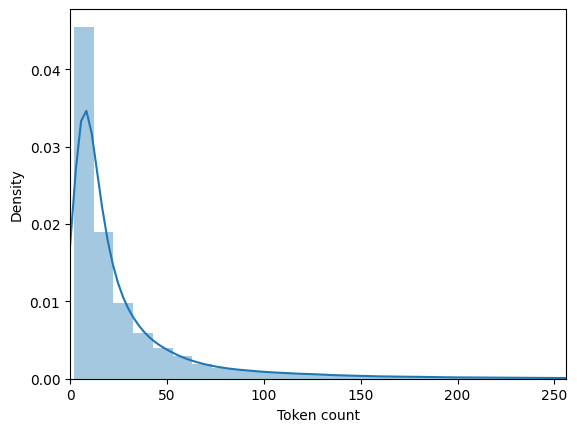

In [39]:
# plot the distribution of review lengths
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count')

In [40]:
class GPReviewDataset(Dataset):
    # Constructor Function
    def __init__(self, reviews, targets, tokenizer, max_len):
        self.reviews = reviews
        self.targets = targets
        self.tokenizer = tokenizer
        self.max_len = max_len

    # Length magic method
    def __len__(self):
        return len(self.reviews)

    # get item magic method
    def __getitem__(self, item):
        review = str(self.reviews[item])
        target = self.targets[item]

        # Encoded format to be returned
        encoding = self.tokenizer.encode_plus(
            review,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            pad_to_max_length=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [42]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split
import random

# Assuming RANDOM_SEED is intended to be used, it should be defined:
RANDOM_SEED = 42  # Or any desired integer
# you can change this random seed value to get different result each time the model train


data_train, data_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
data_val, data_test = train_test_split(data_test, test_size=0.5, random_state=RANDOM_SEED)

print(data_train.shape, data_val.shape, data_test.shape)

(94622, 3) (11828, 3) (11828, 3)


In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

tokens = word_tokenize(data['Review_Text'].str.cat(sep=' '))
stop_words = set(stopwords.words('english'))
filtered_tokens = [w for w in tokens if w not in stop_words]
print(filtered_tokens)



NameError: name 'data' is not defined

## Text Normalization

#### Spelling check

In [ ]:
data = pd.read_csv('AR.csv')

In [ ]:
data['Review_Text'].tail()

NameError: name 'data' is not defined

In [ ]:
from textblob import TextBlob
import contractions

def normalize_text(text):
    text = contractions.fix(text)
    text = TextBlob(text).correct().string
    return text

data['Review_Text'] = data['Review_Text'].apply(normalize_text)

# ***Aspect term extraction***

In [ ]:
from transformers import BertModel, BertTokenizer
from transformers import get_scheduler
import torch
from torch.utils.data import Dataset
from torch.utils.data import Dataset, DataLoader
import time
import os
from tqdm import tqdm

In [ ]:
class ABTEDataset(Dataset):
    def __init__(self, df, tokenizer):
        self.df = df
        self.tokenizer = tokenizer

    def __getitem__(self, index):
        tokens = self.df.iloc[index]['tokens']
        tags = self.df.iloc[index]['tags']
        pols = self.df.iloc[index]['pols']

        tokens = tokens.replace("'", "").strip("][").split(', ')
        tags = tags.strip('][').split(', ')
        pols = pols.strip('][').split(', ')


    def __len__(self):
        return len(self.df)